이 brest cancer wisconsin data를 통해서 의사결정을 도와줄 수 있는 효과적인 classification model을 만드는 것이 목적이다

그렇기 떄문에 다양한 데이터 전처리: data transformation, feature selection 을 이용하고 다양한 decision model algorithm을 이용해 여러가지 모델들의 accuracy를 비교하고 그중 가장 성능이 좋은 모델을 채택할 것이다

우선 사용하는 데이터에 대해 간단한 설명을 하자면 




In [1]:
import pandas as pd                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
table = pd.read_csv("wdbc.csv",header = None)

In [2]:
table.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
name =["ID", "diagnosis","radius","texture","perimeter","area","smoothness","compactness","concavity","concave points","symmetry","fractal dimention",
"radius_SD","texture_SD","perimeter_SD","area_SD","smoothness_SD","compactness_SD","concavity_SD","concave points_SD","symmetry_SD","fractal dimention_SD",
"radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal dimention_worst"
 ]
table.columns = name

In [54]:
table

,ID,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal dimention_worst
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


### data pre-processing

1. check missing value

2. select attribute: id 제거

3. box plot 을 통한 data scale(SD, mean) 평가



In [4]:
# null 값 찾기
pd.isnull(table).any()

ID                         False
diagnosis                  False
radius                     False
texture                    False
perimeter                  False
area                       False
smoothness                 False
compactness                False
concavity                  False
concave points             False
symmetry                   False
fractal dimention          False
radius_SD                  False
texture_SD                 False
perimeter_SD               False
area_SD                    False
smoothness_SD              False
compactness_SD             False
concavity_SD               False
concave points_SD          False
symmetry_SD                False
fractal dimention_SD       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [5]:
t_a = table.iloc[:,1:]

In [6]:
import seaborn as sns
sns.countplot(table["diagnosis"])

위 plot을 보면 이 데이터의 클라스 분포를 알수 있다.

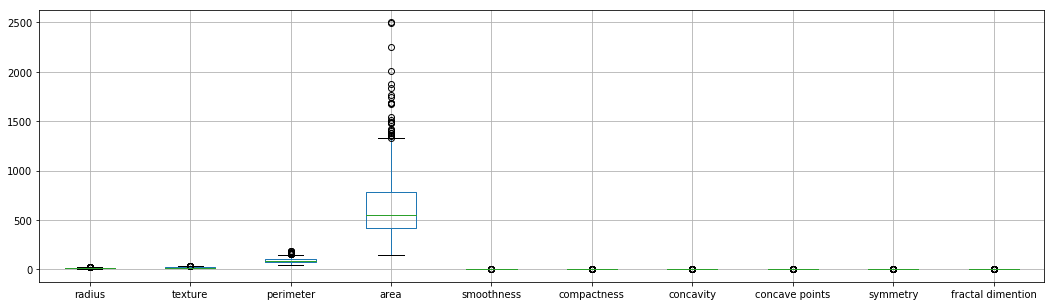

In [7]:
t_a.boxplot(column=name[2:12],figsize=(18,5))

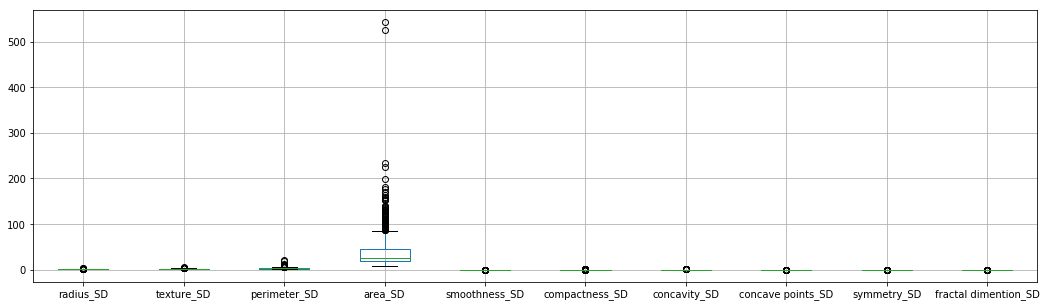

In [8]:
t_a.boxplot(column=name[12:22],figsize=(18,5))

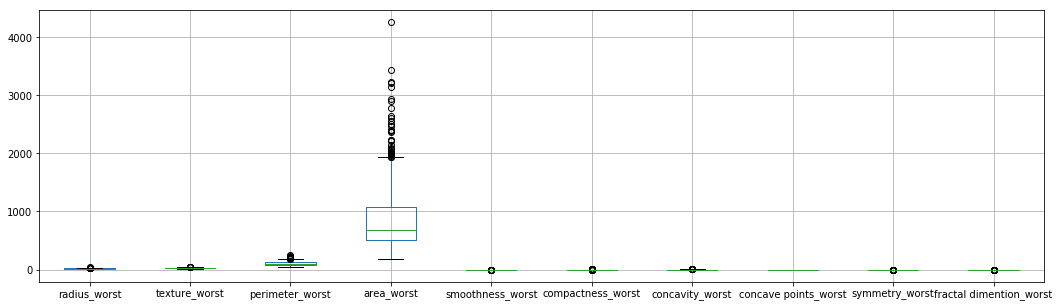

In [9]:
t_a.boxplot(column=name[22:32],figsize=(18,5))

we can see that area, area_SD, area_worst have dominated scale

in order to see other attribute's scale, i will get rid of area, area_SD, area_worst and make a box_plot

In [10]:
t_not_area = t_a.drop([ 'area', 'area_SD', 'area_worst' ],axis=1)

In [11]:
t_not_area.head()

,diagnosis,radius,texture,perimeter,smoothness,compactness,concavity,concave points,symmetry,fractal dimention,...,fractal dimention_SD,radius_worst,texture_worst,perimeter_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal dimention_worst
0,M,17.99,10.38,122.80,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,0.006193,25.38,17.33,184.60,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,0.003532,24.99,23.41,158.80,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,0.004571,23.57,25.53,152.50,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,0.009208,14.91,26.50,98.87,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,0.005115,22.54,16.67,152.20,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


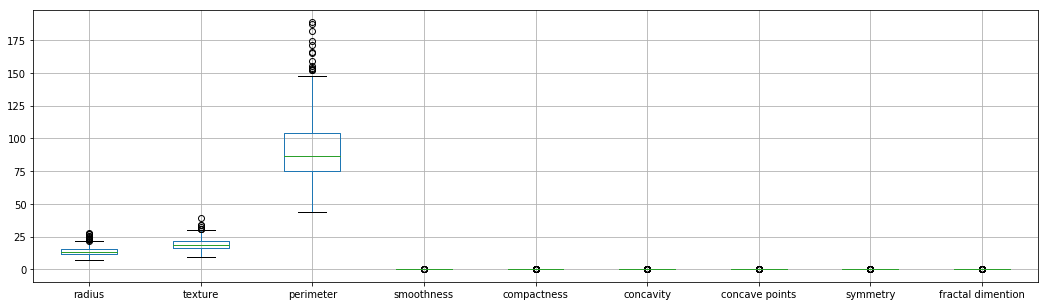

In [12]:
t_not_area.iloc[:,1:10].boxplot(figsize=(18,5))

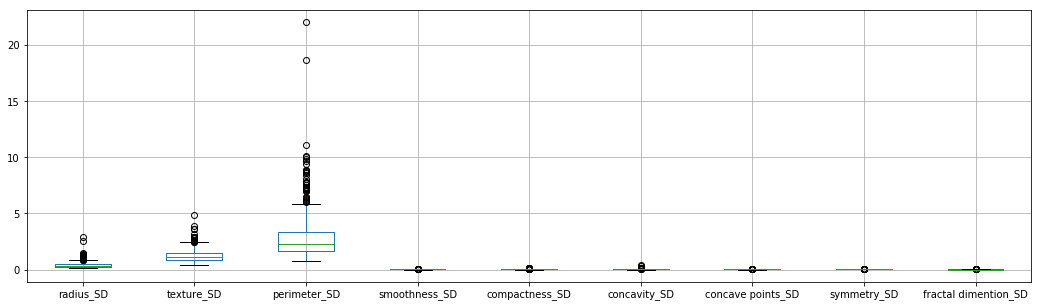

In [13]:
t_not_area.iloc[:,10:19].boxplot(figsize=(18,5))

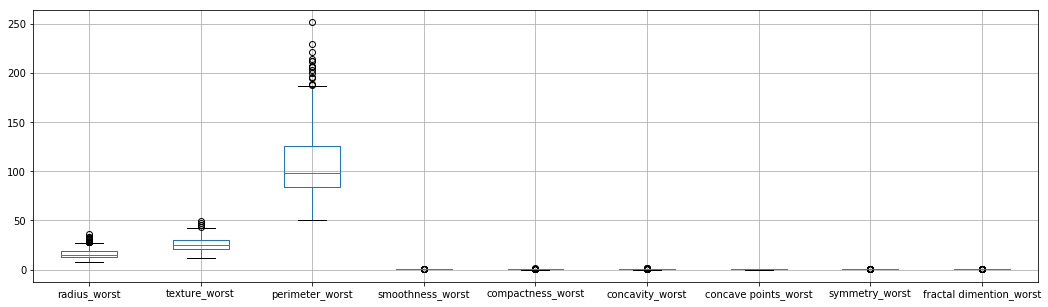

In [14]:
t_not_area.iloc[:,19:28].boxplot(figsize=(18,5))

### data transformation

##### data transformation to 
1. mean = 0, sd = 1
2. min_max scale [0,1]
3. max_abs scale [-1,1]
4. normalization


In [15]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np

# data set attribute / class로 나누기
x_ori = t_a.iloc[:,1:]
y_ori = t_a.iloc[:,0]

# data test set, train set으로 분리
x_train,x_test,y_train,y_test = train_test_split(x_ori,y_ori,test_size = 0.3,random_state =0 )

# scale function mean=0, sd = 1
scaler = preprocessing.StandardScaler().fit(x_ori)
scale_x_test = scaler.transform(x_test)
scale_x_train = scaler.transform(x_train)
scale_x = scaler.transform(x_ori)


# min_max_scaler  [0,1]
min_max_scaler = preprocessing.MinMaxScaler().fit(x_ori)
min_max_x_test = min_max_scaler.transform(x_test)
min_max_x_train= min_max_scaler.transform(x_train)
min_max_x = min_max_scaler.transform(x_ori)

# max_abs_scaler
max_abs_scaler=preprocessing.MaxAbsScaler().fit(x_ori)
max_abs_x_test = max_abs_scaler.transform(x_test)
max_abs_x_train= max_abs_scaler.transform(x_train)
max_abs_x = max_abs_scaler.transform(x_ori)

# normalization
normalization=preprocessing.Normalizer().fit(x_ori)
normalization_x_test = normalization.transform(x_test)
normalization_x_train= normalization.transform(x_train)
normalization_x = normalization.transform(x_ori)


### for feature selection

1. draw a correaltion matrix in order to find dependency among attributes
2. do a PCA with all test sets ( scale, maxmin, maxabs, norm ) and select a number of pca principle component

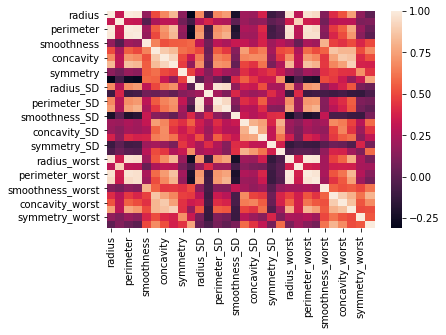

In [16]:
corr4 = t_a.corr()
sns.heatmap(corr4)

위에서 만든 correlation matrix로 직접 feature selection을 하려고 했으니 어느 정도 상관관계 까지 지워야 할지 확실한 기준이 없기 때문에, wrapper apporach를 통해 나중에 비중있게 사용된 attribute을 고려 할 것이다.

이 프로젝트의 목적은 예측력 높은 모델을 생성하는 것이 목적이라고 말했는데, 단순하게 scaled된 데이터를 가지고 하는 것 뿐만 아니라
PCA를 통해 새로운 feature를 생성해내서 그를 가지고 model을 생성할 것이다


0    0.982045
dtype: float64


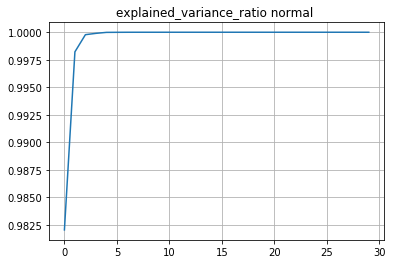

In [17]:
# PCA
from sklearn.decomposition import PCA

########## normal #############################
pca = list()
pca_explained_variance_ratio = list()

for i in range(1,31):
    scale = PCA(n_components=i)
    scale.fit_transform(x_ori)
    pca.append(scale)
    pca_explained_variance_ratio.append(scale.explained_variance_ratio_.tolist())
    
    
pca_ratio = pd.DataFrame(pca_explained_variance_ratio)   

toplot_norm = pca_ratio.T.sum()
print(toplot_norm[toplot_norm>0.95].head(1))

toplot_norm.plot(title = "explained_variance_ratio normal ",grid=True)

9     0.951569
10    0.961366
dtype: float64


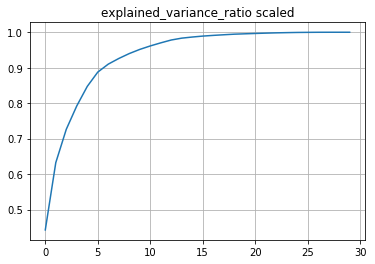

In [18]:
# PCA
from sklearn.decomposition import PCA

########## scale #############################
pca = list()
pca_explained_variance_ratio = list()

for i in range(1,31):
    scale = PCA(n_components=i)
    scale.fit_transform(scale_x)
    pca.append(scale)
    pca_explained_variance_ratio.append(scale.explained_variance_ratio_.tolist())
    
    
pca_ratio = pd.DataFrame(pca_explained_variance_ratio)   

toplot_scale = pca_ratio.T.sum()
print(toplot_scale[toplot_scale>0.95].head(2))
toplot_scale.plot(title = "explained_variance_ratio scaled",grid=True)

9     0.957706
10    0.966200
dtype: float64


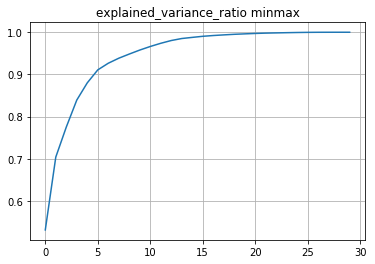

In [19]:

########## MIN MAX ###############

pca = list()
pca_explained_variance_ratio = list()

for i in range(1,31):
    minmax = PCA(n_components=i)
    minmax.fit_transform(min_max_x)
    pca.append(minmax)
    pca_explained_variance_ratio.append(minmax.explained_variance_ratio_.tolist())
pca_ratio = pd.DataFrame(pca_explained_variance_ratio)    

toplot_minmax = pca_ratio.T.sum()
print(toplot_minmax[toplot_minmax>0.95].head(2))
toplot_minmax.plot(title = "explained_variance_ratio minmax",grid=True)


8    0.950385
9    0.960566
dtype: float64


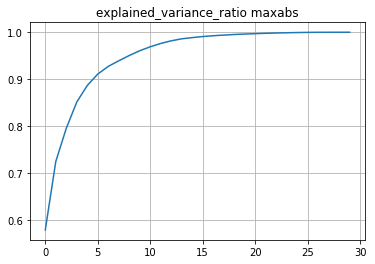

In [20]:
pca = list()
pca_explained_variance_ratio = list()

for i in range(1,31):
    maxabs = PCA(n_components=i)
    maxabs.fit_transform(max_abs_x)
    pca.append(maxabs)
    pca_explained_variance_ratio.append(maxabs.explained_variance_ratio_.tolist())
pca_ratio = pd.DataFrame(pca_explained_variance_ratio)    

toplot_maxabs = pca_ratio.T.sum()
print(toplot_maxabs[toplot_maxabs>0.95].head(2))
toplot_maxabs.plot(title = "explained_variance_ratio maxabs",grid=True)

2    0.984753
3    0.996886
dtype: float64


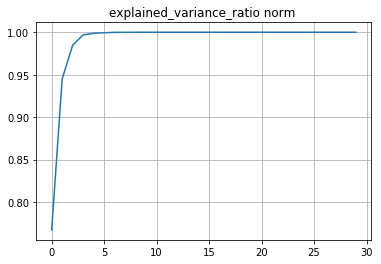

In [55]:
pca = list()
pca_explained_variance_ratio = list()

for i in range(1,31):
    norm = PCA(n_components=i)
    norm.fit_transform(normalization_x)
    pca.append(norm)
    pca_explained_variance_ratio.append(norm.explained_variance_ratio_.tolist())
pca_ratio = pd.DataFrame(pca_explained_variance_ratio)    

toplot_norm = pca_ratio.T.sum()
print(toplot_norm[toplot_norm>0.95].head(2))
toplot_norm.plot(title = "explained_variance_ratio norm ",grid=True)

In [22]:
k_n = 1
k = PCA(n_components=k_n)
k= k.fit_transform(x_ori)
pca_norm= pd.DataFrame(data=k,columns = ["comp"+str(i+1) for i in range(k_n)] )
pca_norm_ = pd.concat([pca_norm,y_ori],axis=1)

k_n = 9
k = PCA(n_components=k_n)
k= k.fit_transform(scale_x)
pca_scale= pd.DataFrame(data=k,columns =["comp"+str(i+1) for i in range(k_n)] )
pca_scale_ = pd.concat([pca_scale,y_ori],axis=1)

k_n = 9
k = PCA(n_components=k_n)
k=k.fit_transform(min_max_x)
pca_minmax= pd.DataFrame(data=k,columns = ["comp"+str(i+1) for i in range(k_n)] )
pca_minmax_ = pd.concat([pca_minmax,y_ori],axis=1)

k_n = 8
k = PCA(n_components=k_n)
k=k.fit_transform(max_abs_x)
pca_maxabs= pd.DataFrame(data=k,columns = ["comp"+str(i+1) for i in range(k_n)] )
pca_maxabs_ = pd.concat([pca_maxabs,y_ori],axis=1)

k_n = 2
k = PCA(n_components=k_n)
k=k.fit_transform(max_abs_x)
pca_normal= pd.DataFrame(data=k,columns = ['comp1','comp2'] )
pca_normal_ = pd.concat([pca_norm,y_ori],axis=1)


지금 까지 data preprocessing 으로 mead = 0, sd =1 / min max / max abs / normalization 에 해당하는 데이터 셋을 따로 만들었고, 
feature selection으로 ID attribute를 없엤고,
feature creation의 일종인 PCA를 통해 새로운 table을 만들었다.

이제 이를 이용하여 다양한 classifier 를 만들것이다

decision tree 와 random forest를 우선 사용할 것인데 이 모델에서는 예측력을 높이는 것도 목적이지만, 모델을 해석하여 어떤 attribute가 영양을 많이 끼치는지 알아보기 위해서 PCA는 사용하지 않을 것이다.

In [23]:
# decision tree

from sklearn import tree

decisionTree_entropy = []
decisionTree_gini = []

###################### normal data #################################


# 트리 생성_entropy
diagnosis_tree_entropy = tree.DecisionTreeClassifier(criterion="entropy",random_state = 0)
diagnosis_tree_entropy.fit(x_train,y_train)

# 트리 생성_gini
diagnosis_tree_gini = tree.DecisionTreeClassifier(criterion="gini",random_state = 0)
diagnosis_tree_gini.fit(x_train,y_train)


# accuracy 구하기
from sklearn.metrics import accuracy_score

# entropy
dia_predict = diagnosis_tree_entropy.predict(x_test)
print('Accuracy of "normal" by criterion = entropy: %.4f' % accuracy_score(y_test, dia_predict))
decisionTree_entropy.append(accuracy_score(y_test, dia_predict))

# gini
dia_predict = diagnosis_tree_gini.predict(x_test)
print('Accuracy of "normal" by criterion = gini: %.4f' % accuracy_score(y_test, dia_predict))
decisionTree_gini.append(accuracy_score(y_test, dia_predict))

#############################  mean = 0, sd = 1 data################################

x_train_ = scale_x_train
x_test_ = scale_x_test

# 트리 생성_entropy
diagnosis_tree_entropy1 = tree.DecisionTreeClassifier(criterion="entropy",random_state = 0)
diagnosis_tree_entropy1.fit(x_train_,y_train)

# 트리 생성_gini
diagnosis_tree_gini1 = tree.DecisionTreeClassifier(criterion="gini",random_state = 0)
diagnosis_tree_gini1.fit(x_train_,y_train)


# accuracy 구하기
from sklearn.metrics import accuracy_score

# entropy
dia_predict = diagnosis_tree_entropy1.predict(x_test_)
print('Accuracy of "scale" by criterion = entropy: %.4f' % accuracy_score(y_test, dia_predict))
decisionTree_entropy.append(accuracy_score(y_test, dia_predict))

# gini
dia_predict = diagnosis_tree_gini1.predict(x_test_)
print('Accuracy of "scale" by criterion = gini: %.4f' % accuracy_score(y_test, dia_predict))
decisionTree_gini.append(accuracy_score(y_test, dia_predict))
######################  min max  [0,1]  data #############################

x_train_ = min_max_x_train
x_test_ = min_max_x_test

# 트리 생성_entropy
diagnosis_tree_entropy11 = tree.DecisionTreeClassifier(criterion="entropy",random_state = 0)
diagnosis_tree_entropy11.fit(x_train_,y_train)

# 트리 생성_gini
diagnosis_tree_gini11 = tree.DecisionTreeClassifier(criterion="gini",random_state = 0)
diagnosis_tree_gini11.fit(x_train_,y_train)


# accuracy 구하기
from sklearn.metrics import accuracy_score

# entropy
dia_predict = diagnosis_tree_entropy11.predict(x_test_)
print('Accuracy of "minmax" by criterion = entropy: %.4f' % accuracy_score(y_test, dia_predict))
decisionTree_entropy.append(accuracy_score(y_test, dia_predict))

# gini
dia_predict = diagnosis_tree_gini11.predict(x_test_)
print('Accuracy of "minmax" by criterion = gini: %.4f' % accuracy_score(y_test, dia_predict))
decisionTree_gini.append(accuracy_score(y_test, dia_predict))

#################### max abs [-1,1]  data  #####################################

x_train_ = max_abs_x_train
x_test_ = max_abs_x_test

# 트리 생성_entropy
diagnosis_tree_entropy12 = tree.DecisionTreeClassifier(criterion="entropy",random_state = 0)
diagnosis_tree_entropy12.fit(x_train_,y_train)

# 트리 생성_gini
diagnosis_tree_gini12 = tree.DecisionTreeClassifier(criterion="gini",random_state = 0)
diagnosis_tree_gini12.fit(x_train_,y_train)


# accuracy 구하기
from sklearn.metrics import accuracy_score

# entropy
dia_predict = diagnosis_tree_entropy12.predict(x_test_)
print('Accuracy of "max abs" by criterion = entropy: %.4f' % accuracy_score(y_test, dia_predict))
decisionTree_entropy.append(accuracy_score(y_test, dia_predict))

# gini
dia_predict = diagnosis_tree_gini12.predict(x_test_)
print('Accuracy of "max abs" by criterion = gini: %.4f' % accuracy_score(y_test, dia_predict))
decisionTree_gini.append(accuracy_score(y_test, dia_predict))

####################### normalization data #########################################

x_train_ = normalization_x_train
x_test_ = normalization_x_test

# 트리 생성_entropy
diagnosis_tree_entropy13 = tree.DecisionTreeClassifier(criterion="entropy",random_state = 0)
diagnosis_tree_entropy13.fit(x_train_,y_train)

# 트리 생성_gini
diagnosis_tree_gini13 = tree.DecisionTreeClassifier(criterion="gini",random_state = 0)
diagnosis_tree_gini13.fit(x_train_,y_train)


# accuracy 구하기
from sklearn.metrics import accuracy_score

# entropy
dia_predict = diagnosis_tree_entropy13.predict(x_test_)
print('Accuracy of "normalization" by criterion = entropy: %.4f' % accuracy_score(y_test, dia_predict))
decisionTree_entropy.append(accuracy_score(y_test, dia_predict))

# gini
dia_predict = diagnosis_tree_gini13.predict(x_test_)
print('Accuracy of "normalization" by criterion = gini: %.4f' % accuracy_score(y_test, dia_predict))
decisionTree_gini.append(accuracy_score(y_test, dia_predict))

Accuracy of "normal" by criterion = entropy: 0.9357
Accuracy of "normal" by criterion = gini: 0.9123
Accuracy of "scale" by criterion = entropy: 0.9357
Accuracy of "scale" by criterion = gini: 0.9123
Accuracy of "minmax" by criterion = entropy: 0.9357
Accuracy of "minmax" by criterion = gini: 0.9123
Accuracy of "max abs" by criterion = entropy: 0.9357
Accuracy of "max abs" by criterion = gini: 0.9123
Accuracy of "normalization" by criterion = entropy: 0.9357
Accuracy of "normalization" by criterion = gini: 0.9357


In [24]:
# random forest

from sklearn.ensemble import RandomForestClassifier

randomForest_gini = []
randomForest_entropy = []

###################### normal data #################################


# random forest 생성_gini
rf_gini = RandomForestClassifier(random_state = 0).fit(x_train,y_train.values.ravel())
# random forest_entropy
rf_entropy = RandomForestClassifier(criterion="entropy" ,random_state = 0).fit(x_train,y_train.values.ravel())
# accuracy 구하기
g=rf_gini.score(x_test,y_test.values.ravel())
e=rf_entropy.score(x_test,y_test.values.ravel())
print('Accuracy of "normal Random Forest" by criterion = entropy: %.4f' % e)
print('Accuracy of "normal Random Forest" by criterion = gini: %.4f' % g)

randomForest_gini.append(g)
randomForest_entropy.append(e)
#############################  mean = 0, sd = 1 data################################

x_train_ = scale_x_train
x_test_ = scale_x_test


# random forest 생성_gini
rf_gini = RandomForestClassifier(random_state = 0).fit(x_train_,y_train.values.ravel())
# random forest_entropy
rf_entropy = RandomForestClassifier(criterion="entropy" ,random_state = 0).fit(x_train_,y_train.values.ravel())
# accuracy 구하기
g=rf_gini.score(x_test_,y_test.values.ravel())
e=rf_entropy.score(x_test_,y_test.values.ravel())
print('Accuracy of "scaled Random Forest" by criterion = entropy: %.4f' % e)
print('Accuracy of "scaled Random Forest" by criterion = gini: %.4f' % g)

randomForest_gini.append(g)
randomForest_entropy.append(e)
######################  min max  [0,1]  data #############################

x_train_ = min_max_x_train
x_test_ = min_max_x_test

# random forest 생성_gini
rf_gini = RandomForestClassifier(random_state = 0).fit(x_train_,y_train.values.ravel())
# random forest_entropy
rf_entropy = RandomForestClassifier(criterion="entropy" ,random_state = 0).fit(x_train_,y_train.values.ravel())
# accuracy 구하기
g=rf_gini.score(x_test_,y_test.values.ravel())
e=rf_entropy.score(x_test_,y_test.values.ravel())
print('Accuracy of "min max Random Forest" by criterion = entropy: %.4f' % e)
print('Accuracy of "min max Random Forest" by criterion = gini: %.4f' % g)

randomForest_gini.append(g)
randomForest_entropy.append(e)
#################### max abs [-1,1]  data  #####################################

x_train_ = max_abs_x_train
x_test_ = max_abs_x_test

# random forest 생성_gini
rf_gini = RandomForestClassifier(random_state = 0).fit(x_train_,y_train.values.ravel())
# random forest_entropy
rf_entropy = RandomForestClassifier(criterion="entropy" ,random_state = 0).fit(x_train_,y_train.values.ravel())
# accuracy 구하기
g=rf_gini.score(x_test_,y_test.values.ravel())
e=rf_entropy.score(x_test_,y_test.values.ravel())
print('Accuracy of "max abs Random Forest" by criterion = entropy: %.4f' % e)
print('Accuracy of "max abs Random Forest" by criterion = gini: %.4f' % g)

randomForest_gini.append(g)
randomForest_entropy.append(e)
####################### normalization data #########################################

x_train_ = normalization_x_train
x_test_ = normalization_x_test

# random forest 생성_gini
rf_gini = RandomForestClassifier(random_state = 0).fit(x_train_,y_train.values.ravel())
# random forest_entropy
rf_entropy = RandomForestClassifier(criterion="entropy" ,random_state = 0).fit(x_train_,y_train.values.ravel())
# accuracy 구하기
g=rf_gini.score(x_test_,y_test.values.ravel())
e=rf_entropy.score(x_test_,y_test.values.ravel())
print('Accuracy of "normalization Random Forest" by criterion = entropy: %.4f' % e)
print('Accuracy of "normalization Random Forest" by criterion = gini: %.4f' % g)

randomForest_gini.append(g)
randomForest_entropy.append(e)


C:\Users\Lee Joo Ye\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Accuracy of "normal Random Forest" by criterion = entropy: 0.9649
Accuracy of "normal Random Forest" by criterion = gini: 0.9649
Accuracy of "scaled Random Forest" by criterion = entropy: 0.9649
Accuracy of "scaled Random Forest" by criterion = gini: 0.9649
Accuracy of "min max Random Forest" by criterion = entropy: 0.9649
Accuracy of "min max Random Forest" by criterion = gini: 0.9649
Accuracy of "max abs Random Forest" by criterion = entropy: 0.9649
Accuracy of "max abs Random Forest" by criterion = gini: 0.9649
Accuracy of "normalization Random Forest" by criterion = entropy: 0.9415
Accuracy of "normalization Random Forest" by criterion = gini: 0.9591


In [25]:
decisionTree_acc = pd.DataFrame()

decisionTree_acc["gini"] =decisionTree_gini
decisionTree_acc["entropy"] = decisionTree_entropy 

decisionTree_acc.index = ["ori","scale","minmax","max abs","normalize"]

randomForest_acc = pd.DataFrame()

randomForest_acc["gini"] = randomForest_gini
randomForest_acc["entropy"]=randomForest_entropy
randomForest_acc.index = ["ori","scale","minmax","max abs","normalize"]

In [110]:
print(decisionTree_acc)

               gini   entropy
ori        0.912281  0.935673
scale      0.912281  0.935673
minmax     0.912281  0.935673
max abs    0.912281  0.935673
normalize  0.935673  0.935673


In [113]:
decisionTree_acc.to_csv("decision tree.csv")

In [111]:
print(randomForest_acc)

               gini   entropy
ori        0.964912  0.964912
scale      0.964912  0.964912
minmax     0.964912  0.964912
max abs    0.964912  0.964912
normalize  0.959064  0.941520


k-nearest neighbors classifier는 PCA를 활용하여 모델을 추가로 생성했다.

In [28]:

k1_ac = []

from sklearn.neighbors import KNeighborsClassifier
k = 1
####################################### normal ###################################
knn1 = KNeighborsClassifier(n_neighbors = k,weights='distance')
knn1.fit(x_train,y_train)
print("accuracy of 1-nearest neighbors by normal data : ",knn1.score(x_test,y_test))

k1_ac.append(knn1.score(x_test,y_test))

#############################  mean = 0, sd = 1 data################################

x_train_ = scale_x_train
x_test_ = scale_x_test
knn1 = KNeighborsClassifier(n_neighbors = k,weights='distance')
knn1.fit(x_train_,y_train)
print("accuracy of 1-nearest neighbors by scaled data: ",knn1.score(x_test_,y_test))

k1_ac.append(knn1.score(x_test_,y_test))

######################  min max  [0,1]  data #############################

x_train_ = min_max_x_train
x_test_ = min_max_x_test
knn1 = KNeighborsClassifier(n_neighbors = k,weights='distance')
knn1.fit(x_train_,y_train)
print("accuracy of 1-nearest neighbors by min max data: ",knn1.score(x_test_,y_test))

k1_ac.append(knn1.score(x_test_,y_test))

#################### max abs [-1,1]  data  #####################################

x_train_ = max_abs_x_train
x_test_ = max_abs_x_test
knn1 = KNeighborsClassifier(n_neighbors = k,weights='distance')
knn1.fit(x_train_,y_train)
print("accuracy of 1-nearest neighbors by max abs  data: ",knn1.score(x_test_,y_test))

k1_ac.append(knn1.score(x_test_,y_test))

####################### normalization data #########################################

x_train_ = normalization_x_train
x_test_ = normalization_x_test
knn1 = KNeighborsClassifier(n_neighbors = k,weights='distance')
knn1.fit(x_train_,y_train)
print("accuracy of 1-nearest neighbors : by normalization ",knn1.score(x_test_,y_test))

k1_ac.append(knn1.score(x_test_,y_test))


accuracy of 1-nearest neighbors by normal data :  0.9181286549707602
accuracy of 1-nearest neighbors by scaled data:  0.935672514619883
accuracy of 1-nearest neighbors by min max data:  0.9298245614035088
accuracy of 1-nearest neighbors by max abs  data:  0.9473684210526315
accuracy of 1-nearest neighbors : by normalization  0.8596491228070176


In [29]:
k1_ac

[0.9181286549707602,
 0.935672514619883,
 0.9298245614035088,
 0.9473684210526315,
 0.8596491228070176]

In [30]:
k=1
######################### PCA ###############################
k1_pca_ac = []

x_train_, x_test_,y_train_,y_test_ = train_test_split(pca_norm,y_ori,test_size = 0.3,random_state =0 )
knn1 = KNeighborsClassifier(n_neighbors = k,weights='distance')
knn1.fit(x_train_,y_train)
print("accuracy of 1-nearest neighbors : by PCA 1 normal ",knn1.score(x_test_,y_test_))
k1_pca_ac.append(knn1.score(x_test_,y_test_))


x_train_, x_test_,y_train_,y_test_ = train_test_split(pca_scale,y_ori,test_size = 0.3,random_state =0 )
knn1 = KNeighborsClassifier(n_neighbors = k,weights='distance')
knn1.fit(x_train_,y_train)
print("accuracy of 1-nearest neighbors : by PCA 13 scaled",knn1.score(x_test_,y_test_))
k1_pca_ac.append(knn1.score(x_test_,y_test_))

x_train_, x_test_,y_train_,y_test_ = train_test_split(pca_minmax,y_ori,test_size = 0.3,random_state =0 )
knn1 = KNeighborsClassifier(n_neighbors = k,weights='distance')
knn1.fit(x_train_,y_train)
print("accuracy of 1-nearest neighbors : by PCA min max 12 ",knn1.score(x_test_,y_test_))
k1_pca_ac.append(knn1.score(x_test_,y_test_))


x_train_, x_test_,y_train_,y_test_ = train_test_split(pca_maxabs,y_ori,test_size = 0.3,random_state =0 )
knn1 = KNeighborsClassifier(n_neighbors = k,weights='distance')
knn1.fit(x_train_,y_train)
print("accuracy of 1-nearest neighbors : by PCA max abs 12 ",knn1.score(x_test_,y_test_))
k1_pca_ac.append(knn1.score(x_test_,y_test_))

x_train_, x_test_ ,y_train_,y_test_= train_test_split(pca_normal,y_ori,test_size = 0.3,random_state =0 )
knn1 = KNeighborsClassifier(n_neighbors = k,weights='distance')
knn1.fit(x_train_,y_train)
print("accuracy of 1-nearest neighbors : by PCA 2  normalization",knn1.score(x_test_,y_test_))
k1_pca_ac.append(knn1.score(x_test_,y_test_))

accuracy of 1-nearest neighbors : by PCA 1 normal  0.8362573099415205
accuracy of 1-nearest neighbors : by PCA 13 scaled 0.9415204678362573
accuracy of 1-nearest neighbors : by PCA min max 12  0.9415204678362573
accuracy of 1-nearest neighbors : by PCA max abs 12  0.9473684210526315
accuracy of 1-nearest neighbors : by PCA 2  normalization 0.8888888888888888


In [31]:
k = 2
k2_ac = []

####################################### normal ###################################
knn2 = KNeighborsClassifier(n_neighbors = k,weights='distance')
knn2.fit(x_train,y_train)
print("accuracy of 2-nearest neighbors by normal data : ",knn2.score(x_test,y_test))
k2_ac.append(knn2.score(x_test,y_test))

#############################  mean = 0, sd = 1 data################################

x_train_ = scale_x_train
x_test_ = scale_x_test
knn2 = KNeighborsClassifier(n_neighbors = k,weights='distance')
knn2.fit(x_train_,y_train)
print("accuracy of 2-nearest neighbors by scaled data: ",knn2.score(x_test_,y_test))
k2_ac.append(knn2.score(x_test_,y_test))

######################  min max  [0,1]  data #############################

x_train_ = min_max_x_train
x_test_ = min_max_x_test
knn2 = KNeighborsClassifier(n_neighbors = k,weights='distance')
knn2.fit(x_train_,y_train)
print("accuracy of 2-nearest neighbors by min max data: ",knn2.score(x_test_,y_test))
k2_ac.append(knn2.score(x_test_,y_test))

#################### max abs [-1,1]  data  #####################################

x_train_ = max_abs_x_train
x_test_ = max_abs_x_test
knn2 = KNeighborsClassifier(n_neighbors = k,weights='distance')
knn2.fit(x_train_,y_train)
print("accuracy of 2-nearest neighbors by max abs  data: ",knn2.score(x_test_,y_test))
k2_ac.append(knn2.score(x_test_,y_test))
####################### normalization data #########################################

x_train_ = normalization_x_train
x_test_ = normalization_x_test
knn2 = KNeighborsClassifier(n_neighbors = k,weights='distance')
knn2.fit(x_train_,y_train)
print("accuracy of 2-nearest neighbors : by normalization ",knn2.score(x_test_,y_test))
k2_ac.append(knn2.score(x_test_,y_test))

accuracy of 2-nearest neighbors by normal data :  0.9181286549707602
accuracy of 2-nearest neighbors by scaled data:  0.935672514619883
accuracy of 2-nearest neighbors by min max data:  0.9298245614035088
accuracy of 2-nearest neighbors by max abs  data:  0.9473684210526315
accuracy of 2-nearest neighbors : by normalization  0.8596491228070176


In [32]:
k=2
k2_pca_ac = []
######################### PCA ###############################

x_train_, x_test_,y_train_,y_test_ = train_test_split(pca_norm,y_ori,test_size = 0.3,random_state =0 )
knn2 = KNeighborsClassifier(n_neighbors = k,weights='distance')
knn2.fit(x_train_,y_train)
print("accuracy of 2-nearest neighbors : by PCA 1 normal ",knn2.score(x_test_,y_test_))
k2_pca_ac.append(knn2.score(x_test_,y_test_))

x_train_, x_test_,y_train_,y_test_ = train_test_split(pca_scale,y_ori,test_size = 0.3,random_state =0 )
knn2 = KNeighborsClassifier(n_neighbors = k,weights='distance')
knn2.fit(x_train_,y_train)
print("accuracy of 2-nearest neighbors : by PCA 9 scaled",knn2.score(x_test_,y_test_))
k2_pca_ac.append(knn2.score(x_test_,y_test_))

x_train_, x_test_,y_train_,y_test_ = train_test_split(pca_minmax,y_ori,test_size = 0.3,random_state =0 )
knn2 = KNeighborsClassifier(n_neighbors = k,weights='distance')
knn2.fit(x_train_,y_train)
print("accuracy of 2-nearest neighbors : by PCA min max 9 ",knn2.score(x_test_,y_test_))
k2_pca_ac.append(knn2.score(x_test_,y_test_))

x_train_, x_test_,y_train_,y_test_ = train_test_split(pca_maxabs,y_ori,test_size = 0.3,random_state =0 )
knn2 = KNeighborsClassifier(n_neighbors = k,weights='distance')
knn2.fit(x_train_,y_train)
print("accuracy of 2-nearest neighbors : by PCA max abs 8 ",knn2.score(x_test_,y_test_))
k2_pca_ac.append(knn2.score(x_test_,y_test_))

x_train_, x_test_ ,y_train_,y_test_= train_test_split(pca_normal,y_ori,test_size = 0.3,random_state =0 )
knn2 = KNeighborsClassifier(n_neighbors = k,weights='distance')
knn2.fit(x_train_,y_train)
print("accuracy of 2-nearest neighbors : by PCA 2  normalization",knn2.score(x_test_,y_test_))
k2_pca_ac.append(knn2.score(x_test_,y_test_))

accuracy of 2-nearest neighbors : by PCA 1 normal  0.8362573099415205
accuracy of 2-nearest neighbors : by PCA 9 scaled 0.9415204678362573
accuracy of 2-nearest neighbors : by PCA min max 9  0.9415204678362573
accuracy of 2-nearest neighbors : by PCA max abs 8  0.9473684210526315
accuracy of 2-nearest neighbors : by PCA 2  normalization 0.8888888888888888


In [33]:
k =3
k3_ac = []

####################################### normal ###################################
knn3 = KNeighborsClassifier(n_neighbors = k,weights='distance')
knn3.fit(x_train,y_train)
print("accuracy of 3-nearest neighbors by normal data : ",knn3.score(x_test,y_test))
a = knn3.score(x_test,y_test)
k3_ac.append(a)

#############################  mean = 0, sd = 1 data################################

x_train_ = scale_x_train
x_test_ = scale_x_test
knn3 = KNeighborsClassifier(n_neighbors = k,weights='distance')
knn3.fit(x_train_,y_train)
print("accuracy of 3-nearest neighbors by scaled data: ",knn3.score(x_test_,y_test))
a = knn3.score(x_test_,y_test)
k3_ac.append(a)

######################  min max  [0,1]  data #############################

x_train_ = min_max_x_train
x_test_ = min_max_x_test
knn3 = KNeighborsClassifier(n_neighbors = k,weights='distance')
knn3.fit(x_train_,y_train)
print("accuracy of 3-nearest neighbors by min max data: ",knn3.score(x_test_,y_test))
a = knn3.score(x_test_,y_test)
k3_ac.append(a)

#################### max abs [-1,1]  data  #####################################

x_train_ = max_abs_x_train
x_test_ = max_abs_x_test
knn3 = KNeighborsClassifier(n_neighbors = k,weights='distance')
knn3.fit(x_train_,y_train)
print("accuracy of 3-nearest neighbors by max abs  data: ",knn3.score(x_test_,y_test))
a = knn3.score(x_test_,y_test)
k3_ac.append(a)

####################### normalization data #########################################

x_train_ = normalization_x_train
x_test_ = normalization_x_test
knn3 = KNeighborsClassifier(n_neighbors = k,weights='distance')
knn3.fit(x_train_,y_train)
print("accuracy of 3-nearest neighbors : by normalization ",knn3.score(x_test_,y_test))
a = knn3.score(x_test_,y_test)
k3_ac.append(a)


accuracy of 3-nearest neighbors by normal data :  0.9239766081871345
accuracy of 3-nearest neighbors by scaled data:  0.9473684210526315
accuracy of 3-nearest neighbors by min max data:  0.9590643274853801
accuracy of 3-nearest neighbors by max abs  data:  0.9415204678362573
accuracy of 3-nearest neighbors : by normalization  0.8830409356725146


In [34]:
k=3
k3_pca_ac = []

######################### PCA ###############################

x_train_, x_test_,y_train_,y_test_ = train_test_split(pca_norm,y_ori,test_size = 0.3,random_state =0 )

knn3 = KNeighborsClassifier(n_neighbors = k,weights='distance')
knn3.fit(x_train_,y_train)
print("accuracy of 3-nearest neighbors : by PCA 1 normal ",knn3.score(x_test_,y_test_))
pc = knn3.score(x_test_,y_test_)
k3_pca_ac.append(pc)

x_train_, x_test_,y_train_,y_test_ = train_test_split(pca_scale,y_ori,test_size = 0.3,random_state =0 )

knn3 = KNeighborsClassifier(n_neighbors = k,weights='distance')
knn3.fit(x_train_,y_train)
print("accuracy of 3-nearest neighbors : by PCA 9 scaled",knn3.score(x_test_,y_test_))
pc = knn3.score(x_test_,y_test_)
k3_pca_ac.append(pc)

x_train_, x_test_,y_train_,y_test_ = train_test_split(pca_minmax,y_ori,test_size = 0.3,random_state =0 )

knn3 = KNeighborsClassifier(n_neighbors = k,weights='distance')
knn3.fit(x_train_,y_train)
print("accuracy of 2-nearest neighbors : by PCA min max 9 ",knn3.score(x_test_,y_test_))
pc = knn3.score(x_test_,y_test_)
k3_pca_ac.append(pc)

x_train_, x_test_,y_train_,y_test_ = train_test_split(pca_maxabs,y_ori,test_size = 0.3,random_state =0 )

knn3 = KNeighborsClassifier(n_neighbors = k,weights='distance')
knn3.fit(x_train_,y_train)
print("accuracy of 2-nearest neighbors : by PCA max abs 8 ",knn3.score(x_test_,y_test_))
pc = knn3.score(x_test_,y_test_)
k3_pca_ac.append(pc)

x_train_, x_test_ ,y_train_,y_test_= train_test_split(pca_normal,y_ori,test_size = 0.3,random_state =0 )

knn3 = KNeighborsClassifier(n_neighbors = k,weights='distance')
knn3.fit(x_train_,y_train)
print("accuracy of 3-nearest neighbors : by PCA 2  normalization",knn3.score(x_test_,y_test_))
pc = knn3.score(x_test_,y_test_)
k3_pca_ac.append(pc)

accuracy of 3-nearest neighbors : by PCA 1 normal  0.8888888888888888
accuracy of 3-nearest neighbors : by PCA 9 scaled 0.9590643274853801
accuracy of 2-nearest neighbors : by PCA min max 9  0.9590643274853801
accuracy of 2-nearest neighbors : by PCA max abs 8  0.9473684210526315
accuracy of 3-nearest neighbors : by PCA 2  normalization 0.8947368421052632


In [35]:
k =4
k4_ac = []
####################################### normal ###################################
knn4 = KNeighborsClassifier(n_neighbors = k,weights='distance')
knn4.fit(x_train,y_train)
print("accuracy of 4-nearest neighbors by normal data : ",knn4.score(x_test,y_test))
a = knn4.score(x_test,y_test)
k4_ac.append(a)

#############################  mean = 0, sd = 1 data################################

x_train_ = scale_x_train
x_test_ = scale_x_test
knn4 = KNeighborsClassifier(n_neighbors = k,weights='distance')
knn4.fit(x_train_,y_train)
print("accuracy of 4-nearest neighbors by scaled data: ",knn4.score(x_test_,y_test))
a = knn4.score(x_test_,y_test)
k4_ac.append(a)

######################  min max  [0,1]  data #############################

x_train_ = min_max_x_train
x_test_ = min_max_x_test
knn4 = KNeighborsClassifier(n_neighbors = k,weights='distance')
knn4.fit(x_train_,y_train)
print("accuracy of 4-nearest neighbors by min max data: ",knn4.score(x_test_,y_test))
a = knn4.score(x_test_,y_test)
k4_ac.append(a)

#################### max abs [-1,1]  data  #####################################

x_train_ = max_abs_x_train
x_test_ = max_abs_x_test
knn4 = KNeighborsClassifier(n_neighbors = k,weights='distance')
knn4.fit(x_train_,y_train)
print("accuracy of 4-nearest neighbors by max abs  data: ",knn4.score(x_test_,y_test))
a = knn4.score(x_test_,y_test)
k4_ac.append(a)

####################### normalization data #########################################

x_train_ = normalization_x_train
x_test_ = normalization_x_test
knn4 = KNeighborsClassifier(n_neighbors = k,weights='distance')
knn4.fit(x_train_,y_train)
print("accuracy of 4-nearest neighbors : by normalization ",knn4.score(x_test_,y_test))
a = knn4.score(x_test_,y_test)
k4_ac.append(a)

accuracy of 4-nearest neighbors by normal data :  0.9239766081871345
accuracy of 4-nearest neighbors by scaled data:  0.9532163742690059
accuracy of 4-nearest neighbors by min max data:  0.9590643274853801
accuracy of 4-nearest neighbors by max abs  data:  0.9473684210526315
accuracy of 4-nearest neighbors : by normalization  0.8888888888888888


In [36]:
k=4
k4_pca_ac = []
######################### PCA ###############################

x_train_, x_test_,y_train_,y_test_ = train_test_split(pca_norm,y_ori,test_size = 0.3,random_state =0 )

knn4 = KNeighborsClassifier(n_neighbors = k,weights='distance')
knn4.fit(x_train_,y_train)
print("accuracy of 4-nearest neighbors : by PCA 1 normal ",knn4.score(x_test_,y_test_))
pc = knn4.score(x_test_,y_test_)
k4_pca_ac.append(pc)

x_train_, x_test_,y_train_,y_test_ = train_test_split(pca_scale,y_ori,test_size = 0.3,random_state =0 )

knn4 = KNeighborsClassifier(n_neighbors = k,weights='distance')
knn4.fit(x_train_,y_train)
print("accuracy of 4-nearest neighbors : by PCA 9 scaled",knn4.score(x_test_,y_test_))
pc = knn4.score(x_test_,y_test_)
k4_pca_ac.append(pc)

x_train_, x_test_,y_train_,y_test_ = train_test_split(pca_minmax,y_ori,test_size = 0.3,random_state =0 )

knn4 = KNeighborsClassifier(n_neighbors = k,weights='distance')
knn4.fit(x_train_,y_train)
print("accuracy of 4-nearest neighbors : by PCA min max 9 ",knn4.score(x_test_,y_test_))
pc = knn4.score(x_test_,y_test_)
k4_pca_ac.append(pc)

x_train_, x_test_,y_train_,y_test_ = train_test_split(pca_maxabs,y_ori,test_size = 0.3,random_state =0 )

knn4 = KNeighborsClassifier(n_neighbors = k,weights='distance')
knn4.fit(x_train_,y_train)
print("accuracy of 4-nearest neighbors : by PCA max abs 8 ",knn4.score(x_test_,y_test_))
pc = knn4.score(x_test_,y_test_)
k4_pca_ac.append(pc)

x_train_, x_test_ ,y_train_,y_test_= train_test_split(pca_normal,y_ori,test_size = 0.3,random_state =0 )

knn4 = KNeighborsClassifier(n_neighbors = k,weights='distance')
knn4.fit(x_train_,y_train)
print("accuracy of 4-nearest neighbors : by PCA 2  normalization",knn4.score(x_test_,y_test_))
pc = knn4.score(x_test_,y_test_)
k4_pca_ac.append(pc)

accuracy of 4-nearest neighbors : by PCA 1 normal  0.8947368421052632
accuracy of 4-nearest neighbors : by PCA 9 scaled 0.9532163742690059
accuracy of 4-nearest neighbors : by PCA min max 9  0.9590643274853801
accuracy of 4-nearest neighbors : by PCA max abs 8  0.9532163742690059
accuracy of 4-nearest neighbors : by PCA 2  normalization 0.8947368421052632


In [37]:
k =5
k5_ac = []
####################################### normal ###################################
knn5 = KNeighborsClassifier(n_neighbors = k,weights='distance')
knn5.fit(x_train,y_train)
print("accuracy of 5-nearest neighbors by normal data : ",knn5.score(x_test,y_test))
a = knn5.score(x_test,y_test)
k5_ac.append(a)

#############################  mean = 0, sd = 1 data################################

x_train_ = scale_x_train
x_test_ = scale_x_test
knn5 = KNeighborsClassifier(n_neighbors = k,weights='distance')
knn5.fit(x_train_,y_train)
print("accuracy of 5-nearest neighbors by scaled data: ",knn5.score(x_test_,y_test))
a = knn5.score(x_test_,y_test)
k5_ac.append(a)

######################  min max  [0,1]  data #############################

x_train_ = min_max_x_train
x_test_ = min_max_x_test
knn5 = KNeighborsClassifier(n_neighbors = k,weights='distance')
knn5.fit(x_train_,y_train)
print("accuracy of 5-nearest neighbors by min max data: ",knn5.score(x_test_,y_test))
a = knn5.score(x_test_,y_test)
k5_ac.append(a)

#################### max abs [-1,1]  data  #####################################

x_train_ = max_abs_x_train
x_test_ = max_abs_x_test
knn5 = KNeighborsClassifier(n_neighbors = k,weights='distance')
knn5.fit(x_train_,y_train)
print("accuracy of 5-nearest neighbors by max abs  data: ",knn5.score(x_test_,y_test))
a = knn5.score(x_test_,y_test)
k5_ac.append(a)

####################### normalization data #########################################

x_train_ = normalization_x_train
x_test_ = normalization_x_test
knn5 = KNeighborsClassifier(n_neighbors = k,weights='distance')
knn5.fit(x_train_,y_train)
print("accuracy of 5-nearest neighbors : by normalization ",knn5.score(x_test_,y_test))
a = knn5.score(x_test_,y_test)
k5_ac.append(a)



accuracy of 5-nearest neighbors by normal data :  0.9473684210526315
accuracy of 5-nearest neighbors by scaled data:  0.9590643274853801
accuracy of 5-nearest neighbors by min max data:  0.9707602339181286
accuracy of 5-nearest neighbors by max abs  data:  0.9532163742690059
accuracy of 5-nearest neighbors : by normalization  0.9239766081871345


In [38]:
k=5
k5_pca_ac = []
######################### PCA ###############################

x_train_, x_test_,y_train_,y_test_ = train_test_split(pca_norm,y_ori,test_size = 0.3,random_state =0 )

knn5 = KNeighborsClassifier(n_neighbors = k,weights='distance')
knn5.fit(x_train_,y_train)
print("accuracy of 5-nearest neighbors : by PCA 1 normal ",knn5.score(x_test_,y_test_))
pc = knn5.score(x_test_,y_test_)
k5_pca_ac.append(pc)


x_train_, x_test_,y_train_,y_test_ = train_test_split(pca_scale,y_ori,test_size = 0.3,random_state =0 )

knn5 = KNeighborsClassifier(n_neighbors = k,weights='distance')
knn5.fit(x_train_,y_train)
print("accuracy of 5-nearest neighbors : by PCA 9 scaled",knn5.score(x_test_,y_test_))
pc = knn5.score(x_test_,y_test_)
k5_pca_ac.append(pc)


x_train_, x_test_,y_train_,y_test_ = train_test_split(pca_minmax,y_ori,test_size = 0.3,random_state =0 )

knn5 = KNeighborsClassifier(n_neighbors = k,weights='distance')
knn5.fit(x_train_,y_train)
print("accuracy of 5-nearest neighbors : by PCA min max 9 ",knn5.score(x_test_,y_test_))
pc = knn5.score(x_test_,y_test_)
k5_pca_ac.append(pc)

x_train_, x_test_,y_train_,y_test_ = train_test_split(pca_maxabs,y_ori,test_size = 0.3,random_state =0 )

knn5 = KNeighborsClassifier(n_neighbors = k,weights='distance')
knn5.fit(x_train_,y_train)
print("accuracy of 5-nearest neighbors : by PCA max abs 8 ",knn5.score(x_test_,y_test_))
pc = knn5.score(x_test_,y_test_)
k5_pca_ac.append(pc)

x_train_, x_test_ ,y_train_,y_test_= train_test_split(pca_normal,y_ori,test_size = 0.3,random_state =0 )

knn5 = KNeighborsClassifier(n_neighbors = k,weights='distance')
knn5.fit(x_train_,y_train)
print("accuracy of 5-nearest neighbors : by PCA 2  normalization",knn5.score(x_test_,y_test_))
pc = knn5.score(x_test_,y_test_)
k5_pca_ac.append(pc)


accuracy of 5-nearest neighbors : by PCA 1 normal  0.9064327485380117
accuracy of 5-nearest neighbors : by PCA 9 scaled 0.9590643274853801
accuracy of 5-nearest neighbors : by PCA min max 9  0.9649122807017544
accuracy of 5-nearest neighbors : by PCA max abs 8  0.9532163742690059
accuracy of 5-nearest neighbors : by PCA 2  normalization 0.9064327485380117


In [39]:
k =6
k6_ac = []
####################################### normal ###################################
knn6 = KNeighborsClassifier(n_neighbors = k,weights='distance')
knn6.fit(x_train,y_train)
print("accuracy of 6-nearest neighbors by normal data : ",knn6.score(x_test,y_test))
a = knn6.score(x_test,y_test)
k6_ac.append(a)


#############################  mean = 0, sd = 1 data################################

x_train_ = scale_x_train
x_test_ = scale_x_test
knn6 = KNeighborsClassifier(n_neighbors = k,weights='distance')
knn6.fit(x_train_,y_train)
print("accuracy of 6-nearest neighbors by scaled data: ",knn6.score(x_test_,y_test))
a = knn6.score(x_test_,y_test)
k6_ac.append(a)

######################  min max  [0,1]  data #############################

x_train_ = min_max_x_train
x_test_ = min_max_x_test
knn6 = KNeighborsClassifier(n_neighbors = k,weights='distance')
knn6.fit(x_train_,y_train)
print("accuracy of 6-nearest neighbors by min max data: ",knn6.score(x_test_,y_test))
a = knn6.score(x_test_,y_test)
k6_ac.append(a)

#################### max abs [-1,1]  data  #####################################

x_train_ = max_abs_x_train
x_test_ = max_abs_x_test
knn6 = KNeighborsClassifier(n_neighbors = k,weights='distance')
knn6.fit(x_train_,y_train)
print("accuracy of 6-nearest neighbors by max abs  data: ",knn6.score(x_test_,y_test))
a = knn6.score(x_test_,y_test)
k6_ac.append(a)

####################### normalization data #########################################

x_train_ = normalization_x_train
x_test_ = normalization_x_test
knn6 = KNeighborsClassifier(n_neighbors = k,weights='distance')
knn6.fit(x_train_,y_train)
print("accuracy of 6-nearest neighbors : by normalization ",knn6.score(x_test_,y_test))
a = knn6.score(x_test_,y_test)
k6_ac.append(a)


accuracy of 6-nearest neighbors by normal data :  0.9415204678362573
accuracy of 6-nearest neighbors by scaled data:  0.9649122807017544
accuracy of 6-nearest neighbors by min max data:  0.9707602339181286
accuracy of 6-nearest neighbors by max abs  data:  0.9532163742690059
accuracy of 6-nearest neighbors : by normalization  0.9298245614035088


In [40]:
k=6
k6_pca_ac =[]
######################### PCA ###############################

x_train_, x_test_,y_train_,y_test_ = train_test_split(pca_norm,y_ori,test_size = 0.3,random_state =0 )

knn6 = KNeighborsClassifier(n_neighbors = k,weights='distance')
knn6.fit(x_train_,y_train_)
print("accuracy of 6-nearest neighbors : by PCA 1 normal ",knn6.score(x_test_,y_test_))
pc = knn6.score(x_test_,y_test_)
k6_pca_ac.append(pc)

x_train_, x_test_,y_train_,y_test_ = train_test_split(pca_scale,y_ori,test_size = 0.3,random_state =0 )

knn6 = KNeighborsClassifier(n_neighbors = k,weights='distance')
knn6.fit(x_train_,y_train_)
print("accuracy of 6-nearest neighbors : by PCA 9 scaled",knn6.score(x_test_,y_test_))
pc = knn6.score(x_test_,y_test_)
k6_pca_ac.append(pc)

x_train_, x_test_,y_train_,y_test_ = train_test_split(pca_minmax,y_ori,test_size = 0.3,random_state =0 )

knn6 = KNeighborsClassifier(n_neighbors = k,weights='distance')
knn6.fit(x_train_,y_train_)
print("accuracy of 6-nearest neighbors : by PCA min max 9 ",knn6.score(x_test_,y_test_))
pc = knn6.score(x_test_,y_test_)
k6_pca_ac.append(pc)

x_train_, x_test_,y_train_,y_test_ = train_test_split(pca_maxabs,y_ori,test_size = 0.3,random_state =0 )

knn6 = KNeighborsClassifier(n_neighbors = k,weights='distance')
knn6.fit(x_train_,y_train_)
print("accuracy of 6-nearest neighbors : by PCA max abs 8 ",knn6.score(x_test_,y_test_))
pc = knn6.score(x_test_,y_test_)
k6_pca_ac.append(pc)

x_train_, x_test_ ,y_train_,y_test_= train_test_split(pca_normal,y_ori,test_size = 0.3,random_state =0 )

knn6 = KNeighborsClassifier(n_neighbors = k,weights='distance')
knn6.fit(x_train_,y_train_)
print("accuracy of 6-nearest neighbors : by PCA 2  normalization",knn6.score(x_test_,y_test_))
pc = knn6.score(x_test_,y_test_)
k6_pca_ac.append(pc)

accuracy of 6-nearest neighbors : by PCA 1 normal  0.9005847953216374
accuracy of 6-nearest neighbors : by PCA 9 scaled 0.9590643274853801
accuracy of 6-nearest neighbors : by PCA min max 9  0.9707602339181286
accuracy of 6-nearest neighbors : by PCA max abs 8  0.9473684210526315
accuracy of 6-nearest neighbors : by PCA 2  normalization 0.9064327485380117


In [61]:
accuracy_table_knn = pd.DataFrame()
accuracy_table_knn[" k= 1"] = k1_ac
accuracy_table_knn[" k= 2"] = k2_ac
accuracy_table_knn[" k= 3"] = k3_ac
accuracy_table_knn[" k= 4"] = k4_ac
accuracy_table_knn[" k= 5"] = k5_ac
accuracy_table_knn[" k= 6"] = k6_ac
accuracy_table_knn.index = ["ori","scale","minmax","max abs","normalize"]

accuracy_table_knn_pca = pd.DataFrame()
accuracy_table_knn_pca[" k= 1"] = k1_pca_ac
accuracy_table_knn_pca[" k= 2"] = k2_pca_ac
accuracy_table_knn_pca[" k= 3"] = k3_pca_ac
accuracy_table_knn_pca[" k= 4"] = k4_pca_ac
accuracy_table_knn_pca[" k= 5"] = k5_pca_ac
accuracy_table_knn_pca[" k= 6"] = k6_pca_ac
accuracy_table_knn_pca.index = ["ori","scale","minmax","max abs","normalize"]

In [62]:
accuracy_table_knn

,k= 1,k= 2,k= 3,k= 4,k= 5,k= 6
ori,0.918129,0.918129,0.923977,0.923977,0.947368,0.941520
scale,0.935673,0.935673,0.947368,0.953216,0.959064,0.964912
minmax,0.929825,0.929825,0.959064,0.959064,0.970760,0.970760
max abs,0.947368,0.947368,0.941520,0.947368,0.953216,0.953216
normalize,0.859649,0.859649,0.883041,0.888889,0.923977,0.929825


In [109]:
print(accuracy_table_knn )

               k= 1      k= 2      k= 3      k= 4      k= 5      k= 6
ori        0.918129  0.918129  0.923977  0.923977  0.947368  0.941520
scale      0.935673  0.935673  0.947368  0.953216  0.959064  0.964912
minmax     0.929825  0.929825  0.959064  0.959064  0.970760  0.970760
max abs    0.947368  0.947368  0.941520  0.947368  0.953216  0.953216
normalize  0.859649  0.859649  0.883041  0.888889  0.923977  0.929825


In [63]:
accuracy_table_knn_pca

,k= 1,k= 2,k= 3,k= 4,k= 5,k= 6
ori,0.836257,0.836257,0.888889,0.894737,0.906433,0.900585
scale,0.941520,0.941520,0.959064,0.953216,0.959064,0.959064
minmax,0.941520,0.941520,0.959064,0.959064,0.964912,0.970760
max abs,0.947368,0.947368,0.947368,0.953216,0.953216,0.947368
normalize,0.888889,0.888889,0.894737,0.894737,0.906433,0.906433


In [108]:
print(accuracy_table_knn_pca)

               k= 1      k= 2      k= 3      k= 4      k= 5      k= 6
ori        0.836257  0.836257  0.888889  0.894737  0.906433  0.900585
scale      0.941520  0.941520  0.959064  0.953216  0.959064  0.959064
minmax     0.941520  0.941520  0.959064  0.959064  0.964912  0.970760
max abs    0.947368  0.947368  0.947368  0.953216  0.953216  0.947368
normalize  0.888889  0.888889  0.894737  0.894737  0.906433  0.906433


In [114]:
accuracy_table_knn_pca-accuracy_table_knn

,k= 1,k= 2,k= 3,k= 4,k= 5,k= 6
ori,-0.081871,-0.081871,-0.035088,-0.029240,-0.040936,-0.040936
scale,0.005848,0.005848,0.011696,0.000000,0.000000,-0.005848
minmax,0.011696,0.011696,0.000000,0.000000,-0.005848,0.000000
max abs,0.000000,0.000000,0.005848,0.005848,0.000000,-0.005848
normalize,0.029240,0.029240,0.011696,0.005848,-0.017544,-0.023392


In [116]:
accuracy_table_knn[accuracy_table_knn_pca>accuracy_table_knn]

,k= 1,k= 2,k= 3,k= 4,k= 5,k= 6
ori,NaN,NaN,NaN,NaN,NaN,NaN
scale,0.935673,0.935673,0.947368,NaN,NaN,NaN
minmax,0.929825,0.929825,NaN,NaN,NaN,NaN
max abs,NaN,NaN,0.941520,0.947368,NaN,NaN
normalize,0.859649,0.859649,0.883041,0.888889,NaN,NaN


In [44]:
# perceptron

from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron

x_train_, x_test_,y_train_,y_test_ = train_test_split(x_ori,y_ori,test_size = 0.3,random_state =0 )
perceptron = Perceptron(random_state=0).fit(x_train_, y_train_.values.ravel())

perceptron.score(x_test_, y_test_.values.ravel())


C:\Users\Lee Joo Ye\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.9064327485380117

In [71]:
# perceptron
perceptron_ac = []

from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron

################################### original ################################
x_train_, x_test_,y_train_,y_test_ = train_test_split(x_ori,y_ori,test_size = 0.3,random_state =0 )
perceptron = Perceptron(random_state=0).fit(x_train_, y_train_.values.ravel())
a = perceptron.score(x_test_, y_test_.values.ravel())
perceptron_ac.append(a)


################ scaled ##################
x_train_, x_test_,y_train_,y_test_ = train_test_split(scale_x,y_ori,test_size = 0.3,random_state =0 )
perceptron = Perceptron(random_state=0).fit(x_train_, y_train_.values.ravel())
a = perceptron.score(x_test_, y_test_.values.ravel())
perceptron_ac.append(a)

################## min_max_x ########################
x_train_, x_test_,y_train_,y_test_ = train_test_split(min_max_x,y_ori,test_size = 0.3,random_state =0 )
perceptron = Perceptron(random_state=0).fit(x_train_, y_train_.values.ravel())

a = perceptron.score(x_test_, y_test_.values.ravel())
perceptron_ac.append(a)

#####################  max_abs_x #####################
x_train_, x_test_,y_train_,y_test_ = train_test_split(max_abs_x,y_ori,test_size = 0.3,random_state =0 )
perceptron = Perceptron(random_state=0).fit(x_train_, y_train_.values.ravel())

a = perceptron.score(x_test_, y_test_.values.ravel())
perceptron_ac.append(a)

#################### normalization_x ################

x_train_, x_test_,y_train_,y_test_ = train_test_split(normalization_x,y_ori,test_size = 0.3,random_state =0 )
perceptron = Perceptron(random_state=0).fit(x_train_, y_train_.values.ravel())

a = perceptron.score(x_test_, y_test_.values.ravel())
perceptron_ac.append(a)

In [74]:
#perceptron PCA

perceptron_pca_ac=[]

######################## ori ####################

x_train_, x_test_,y_train_,y_test_ = train_test_split(pca_norm,y_ori,test_size = 0.3,random_state =0 )
perceptron = Perceptron(random_state=0).fit(x_train_, y_train_.values.ravel())
a = perceptron.score(x_test_, y_test_.values.ravel())
perceptron_pca_ac.append(a)


##################### scaled ##################
x_train_, x_test_,y_train_,y_test_ = train_test_split(pca_scale ,y_ori,test_size = 0.3,random_state =0 )
perceptron = Perceptron(random_state=0).fit(x_train_, y_train_.values.ravel())
a = perceptron.score(x_test_, y_test_.values.ravel())
perceptron_pca_ac.append(a)

################## min_max_x ########################
x_train_, x_test_,y_train_,y_test_ = train_test_split(pca_minmax ,y_ori,test_size = 0.3,random_state =0 )
perceptron = Perceptron(random_state=0).fit(x_train_, y_train_.values.ravel())

a = perceptron.score(x_test_, y_test_.values.ravel())
perceptron_pca_ac.append(a)

#####################  max_abs_x #####################
x_train_, x_test_,y_train_,y_test_ = train_test_split(pca_maxabs ,y_ori,test_size = 0.3,random_state =0 )
perceptron = Perceptron(random_state=0).fit(x_train_, y_train_.values.ravel())

a = perceptron.score(x_test_, y_test_.values.ravel())
perceptron_pca_ac.append(a)

#################### normalization_x ################

x_train_, x_test_,y_train_,y_test_ = train_test_split(pca_normal ,y_ori,test_size = 0.3,random_state =0 )
perceptron = Perceptron(random_state=0).fit(x_train_, y_train_.values.ravel())

a = perceptron.score(x_test_, y_test_.values.ravel())
perceptron_pca_ac.append(a)

In [100]:
p_ac = pd.DataFrame()
p_ac["perceptron"]=perceptron_ac
p_ac["perceptron_PCA"]=perceptron_pca_ac
p_ac.index = ["ori","scale","minmax","max abs","normalize"]

In [122]:
p_ac.columns

Index(['perceptron', 'perceptron_PCA'], dtype='object')

In [132]:
p_ac.iloc[:,0] - p_ac.iloc[:,1]

ori         -0.017544
scale        0.029240
minmax       0.023392
max abs     -0.040936
normalize   -0.005848
dtype: float64

In [121]:
p_ac

,perceptron,perceptron_PCA
ori,0.906433,0.923977
scale,0.947368,0.918129
minmax,0.982456,0.959064
max abs,0.923977,0.964912
normalize,0.918129,0.923977


In [98]:
################################################# MLP ##########################################
from sklearn.neural_network import MLPClassifier

activation=('identity', 'logistic', 'tanh', 'relu')
solver = ['lbfgs', 'sgd','adam']


################################# original ###################################
mlp_acccuracy = pd.DataFrame()

x_train_, x_test_,y_train_,y_test_ =  train_test_split(x_ori,y_ori,test_size = 0.3,random_state =0 )

for i in solver:
    mlp_relu = MLPClassifier(solver = i, random_state=1, max_iter=10000).fit(x_train_, y_train)
    mlp_tanh = MLPClassifier(solver = i,random_state=1,activation='tanh', max_iter=10000).fit(x_train_, y_train_.values.ravel())
    mlp_i = MLPClassifier(solver = i,random_state=1,activation='identity', max_iter=10000).fit(x_train_, y_train_.values.ravel())
    mlp_l = MLPClassifier(solver = i,random_state=1,activation='logistic', max_iter=10000).fit(x_train_, y_train_.values.ravel())
    
    mlp_acccuracy[i] = [mlp_i.score(x_test_, y_test_.values.ravel()),mlp_l.score(x_test_, y_test_.values.ravel()),mlp_tanh.score(x_test_, y_test_.values.ravel()),mlp_relu.score(x_test_, y_test_.values.ravel()) ]
mlp_acccuracy.index=activation  
    
################################### scale ########################################
mlp_scale_acccuracy = pd.DataFrame()

x_train_, x_test_,y_train_,y_test_ =  train_test_split(scale_x,y_ori,test_size = 0.3,random_state =0 )

for i in solver:
    mlp_relu = MLPClassifier(solver = i, random_state=1, max_iter=10000).fit(x_train, y_train)
    mlp_tanh = MLPClassifier(solver = i,random_state=1,activation='tanh', max_iter=10000).fit(x_train_, y_train_.values.ravel())
    mlp_i = MLPClassifier(solver = i,random_state=1,activation='identity', max_iter=10000).fit(x_train_, y_train_.values.ravel())
    mlp_l = MLPClassifier(solver = i,random_state=1,activation='logistic', max_iter=10000).fit(x_train_, y_train_.values.ravel())
    
    mlp_scale_acccuracy[i] = [mlp_i.score(x_test_, y_test_.values.ravel()),mlp_l.score(x_test_, y_test_.values.ravel()),mlp_tanh.score(x_test_, y_test_.values.ravel()),mlp_relu.score(x_test_, y_test_.values.ravel()) ]
mlp_scale_acccuracy.index=activation   



########################################## min max #########################################
mlp_minmax_acccuracy = pd.DataFrame()

x_train_, x_test_,y_train_,y_test_ =  train_test_split(min_max_x,y_ori,test_size = 0.3,random_state =0 )

for i in solver:
    mlp_relu = MLPClassifier(solver = i, random_state=1, max_iter=10000).fit(x_train, y_train)
    mlp_tanh = MLPClassifier(solver = i,random_state=1,activation='tanh', max_iter=10000).fit(x_train_, y_train_.values.ravel())
    mlp_i = MLPClassifier(solver = i,random_state=1,activation='identity', max_iter=10000).fit(x_train_, y_train_.values.ravel())
    mlp_l = MLPClassifier(solver = i,random_state=1,activation='logistic', max_iter=10000).fit(x_train_, y_train_.values.ravel())
    
    mlp_minmax_acccuracy[i] = [mlp_i.score(x_test_, y_test_.values.ravel()),mlp_l.score(x_test_, y_test_.values.ravel()),mlp_tanh.score(x_test_, y_test_.values.ravel()),mlp_relu.score(x_test_, y_test_.values.ravel()) ]
mlp_minmax_acccuracy.index=activation   

######################################### max abs ##################################
mlp_maxabs_acccuracy = pd.DataFrame()

x_train_, x_test_,y_train_,y_test_ =  train_test_split(max_abs_x,y_ori,test_size = 0.3,random_state =0 )

for i in solver:
    mlp_relu = MLPClassifier(solver = i, random_state=1, max_iter=10000).fit(x_train, y_train)
    mlp_tanh = MLPClassifier(solver = i,random_state=1,activation='tanh', max_iter=10000).fit(x_train_, y_train_.values.ravel())
    mlp_i = MLPClassifier(solver = i,random_state=1,activation='identity', max_iter=10000).fit(x_train_, y_train_.values.ravel())
    mlp_l = MLPClassifier(solver = i,random_state=1,activation='logistic', max_iter=10000).fit(x_train_, y_train_.values.ravel())
    
    mlp_maxabs_acccuracy[i] = [mlp_i.score(x_test_, y_test_.values.ravel()),mlp_l.score(x_test_, y_test_.values.ravel()),mlp_tanh.score(x_test_, y_test_.values.ravel()),mlp_relu.score(x_test_, y_test_.values.ravel()) ]
mlp_maxabs_acccuracy.index=activation   


##################################### normalize ##############################

mlp_noramlize_acccuracy = pd.DataFrame()

x_train_, x_test_,y_train_,y_test_ =  train_test_split(normalization_x,y_ori,test_size = 0.3,random_state =0 )

for i in solver:
    mlp_relu = MLPClassifier(solver = i, random_state=1, max_iter=10000).fit(x_train, y_train)
    mlp_tanh = MLPClassifier(solver = i,random_state=1,activation='tanh', max_iter=10000).fit(x_train_, y_train_.values.ravel())
    mlp_i = MLPClassifier(solver = i,random_state=1,activation='identity', max_iter=10000).fit(x_train_, y_train_.values.ravel())
    mlp_l = MLPClassifier(solver = i,random_state=1,activation='logistic', max_iter=10000).fit(x_train_, y_train_.values.ravel())
    
    mlp_noramlize_acccuracy[i] = [mlp_i.score(x_test_, y_test_.values.ravel()),mlp_l.score(x_test_, y_test_.values.ravel()),mlp_tanh.score(x_test_, y_test_.values.ravel()),mlp_relu.score(x_test_, y_test_.values.ravel()) ]
mlp_noramlize_acccuracy.index=activation  

mlp_ac = pd.concat([mlp_acccuracy,mlp_scale_acccuracy,mlp_minmax_acccuracy,mlp_maxabs_acccuracy,mlp_noramlize_acccuracy],axis = 1)
mlp_ac.columns = [["normal"]*3+["scaled"]*3+["minmax"]*3+["maxmin"]*3+["normalized"]*3,['lbfgs', 'sgd','adam']*5 ]
mlp_ac.index = ['identity', 'logistic', 'tanh', 'relu']


In [99]:
mlp_ac

normal                        scaled                      \
             lbfgs       sgd      adam     lbfgs       sgd      adam   
identity  0.953216  0.368421  0.894737  0.941520  0.970760  0.959064   
logistic  0.964912  0.918129  0.941520  0.947368  0.953216  0.976608   
tanh      0.970760  0.894737  0.912281  0.953216  0.964912  0.964912   
relu      0.964912  0.631579  0.707602  0.578947  0.298246  0.497076   

            minmax                        maxmin                      \
             lbfgs       sgd      adam     lbfgs       sgd      adam   
identity  0.941520  0.929825  0.970760  0.947368  0.918129  0.959064   
logistic  0.953216  0.631579  0.982456  0.959064  0.631579  0.959064   
tanh      0.953216  0.929825  0.970760  0.947368  0.918129  0.959064   
relu      0.654971  0.216374  0.631579  0.654971  0.239766  0.631579   

         normalized                      
              lbfgs       sgd      adam  
identity   0.941520  0.631579  0.953216  
logistic   0.935673  0.631579  0.631579  
tanh       0.929825  0.631579  0.953216  
relu       0.631579  0.631579  0.631579

In [78]:
########################## MLP PCA ##############################################################

from sklearn.neural_network import MLPClassifier

activation=('identity', 'logistic', 'tanh', 'relu')
solver = ['lbfgs', 'sgd','adam']

# solver
######################################### original ####################################
mlp_acccuracy_pca = pd.DataFrame()
x_train_, x_test_,y_train_,y_test_ =  train_test_split(pca_norm,y_ori,test_size = 0.3,random_state =0 )

for i in solver:
    mlp_relu = MLPClassifier(solver = i, random_state=1, max_iter=10000).fit(x_train_, y_train)
    mlp_tanh = MLPClassifier(solver = i,random_state=1,activation='tanh', max_iter=10000).fit(x_train_, y_train_.values.ravel())
    mlp_i = MLPClassifier(solver = i,random_state=1,activation='identity', max_iter=10000).fit(x_train_, y_train_.values.ravel())
    mlp_l = MLPClassifier(solver = i,random_state=1,activation='logistic', max_iter=10000).fit(x_train_, y_train_.values.ravel())
    
    mlp_acccuracy_pca[i] = [mlp_i.score(x_test_, y_test_.values.ravel()),mlp_l.score(x_test_, y_test_.values.ravel()),mlp_tanh.score(x_test_, y_test_.values.ravel()),mlp_relu.score(x_test_, y_test_.values.ravel()) ]

############################################# scaled #####################################
mlp_acccuracy_pca_scaled = pd.DataFrame()
x_train_, x_test_,y_train_,y_test_ =  train_test_split(pca_scale,y_ori,test_size = 0.3,random_state =0 )

for i in solver:
    mlp_relu = MLPClassifier(solver = i, random_state=1, max_iter=10000).fit(x_train_, y_train)
    mlp_tanh = MLPClassifier(solver = i,random_state=1,activation='tanh', max_iter=10000).fit(x_train_, y_train_.values.ravel())
    mlp_i = MLPClassifier(solver = i,random_state=1,activation='identity', max_iter=10000).fit(x_train_, y_train_.values.ravel())
    mlp_l = MLPClassifier(solver = i,random_state=1,activation='logistic', max_iter=10000).fit(x_train_, y_train_.values.ravel())
    
    mlp_acccuracy_pca_scaled[i] = [mlp_i.score(x_test_, y_test_.values.ravel()),mlp_l.score(x_test_, y_test_.values.ravel()),mlp_tanh.score(x_test_, y_test_.values.ravel()),mlp_relu.score(x_test_, y_test_.values.ravel()) ]

############################################# min max #####################################  
mlp_acccuracy_pca_minmax = pd.DataFrame()
x_train_, x_test_,y_train_,y_test_ =  train_test_split(pca_minmax,y_ori,test_size = 0.3,random_state =0 )

for i in solver:
    mlp_relu = MLPClassifier(solver = i, random_state=1, max_iter=10000).fit(x_train_, y_train)
    mlp_tanh = MLPClassifier(solver = i,random_state=1,activation='tanh', max_iter=10000).fit(x_train_, y_train_.values.ravel())
    mlp_i = MLPClassifier(solver = i,random_state=1,activation='identity', max_iter=10000).fit(x_train_, y_train_.values.ravel())
    mlp_l = MLPClassifier(solver = i,random_state=1,activation='logistic', max_iter=10000).fit(x_train_, y_train_.values.ravel())
    
    mlp_acccuracy_pca_minmax[i] = [mlp_i.score(x_test_, y_test_.values.ravel()),mlp_l.score(x_test_, y_test_.values.ravel()),mlp_tanh.score(x_test_, y_test_.values.ravel()),mlp_relu.score(x_test_, y_test_.values.ravel()) ]

    
############################################# max abs #####################################  
mlp_acccuracy_pca_maxabs = pd.DataFrame()
x_train_, x_test_,y_train_,y_test_ =  train_test_split(pca_maxabs,y_ori,test_size = 0.3,random_state =0 )

for i in solver:
    mlp_relu = MLPClassifier(solver = i, random_state=1, max_iter=10000).fit(x_train_, y_train)
    mlp_tanh = MLPClassifier(solver = i,random_state=1,activation='tanh', max_iter=10000).fit(x_train_, y_train_.values.ravel())
    mlp_i = MLPClassifier(solver = i,random_state=1,activation='identity', max_iter=10000).fit(x_train_, y_train_.values.ravel())
    mlp_l = MLPClassifier(solver = i,random_state=1,activation='logistic', max_iter=10000).fit(x_train_, y_train_.values.ravel())
    
    mlp_acccuracy_pca_maxabs[i] = [mlp_i.score(x_test_, y_test_.values.ravel()),mlp_l.score(x_test_, y_test_.values.ravel()),mlp_tanh.score(x_test_, y_test_.values.ravel()),mlp_relu.score(x_test_, y_test_.values.ravel()) ]
    
############################################# normalized #####################################  
mlp_acccuracy_pca_normal = pd.DataFrame()
x_train_, x_test_,y_train_,y_test_ =  train_test_split(pca_normal,y_ori,test_size = 0.3,random_state =0 )

for i in solver:
    mlp_relu = MLPClassifier(solver = i, random_state=1, max_iter=10000).fit(x_train_, y_train)
    mlp_tanh = MLPClassifier(solver = i,random_state=1,activation='tanh', max_iter=10000).fit(x_train_, y_train_.values.ravel())
    mlp_i = MLPClassifier(solver = i,random_state=1,activation='identity', max_iter=10000).fit(x_train_, y_train_.values.ravel())
    mlp_l = MLPClassifier(solver = i,random_state=1,activation='logistic', max_iter=10000).fit(x_train_, y_train_.values.ravel())
    
    mlp_acccuracy_pca_normal[i] = [mlp_i.score(x_test_, y_test_.values.ravel()),mlp_l.score(x_test_, y_test_.values.ravel()),mlp_tanh.score(x_test_, y_test_.values.ravel()),mlp_relu.score(x_test_, y_test_.values.ravel()) ]
 

In [93]:
mlpl_pca = pd.concat( [mlp_acccuracy_pca, mlp_acccuracy_pca_sclaed, mlp_acccuracy_pca_minmax, mlp_acccuracy_pca_maxabs, mlp_acccuracy_pca_normal] , axis = 1)
mlpl_pca.columns = [["normal"]*3+["scaled"]*3+["minmax"]*3+["maxmin"]*3+["normalized"]*3,['lbfgs', 'sgd','adam']*5 ]
mlpl_pca.index = ['identity', 'logistic', 'tanh', 'relu']

In [94]:
mlpl_pca

normal                        scaled                      \
             lbfgs       sgd      adam     lbfgs       sgd      adam   
identity  0.912281  0.923977  0.923977  0.941520  0.959064  0.959064   
logistic  0.923977  0.918129  0.906433  0.935673  0.941520  0.959064   
tanh      0.918129  0.923977  0.912281  0.959064  0.959064  0.964912   
relu      0.912281  0.923977  0.923977  0.964912  0.941520  0.976608   

            minmax                        maxmin                      \
             lbfgs       sgd      adam     lbfgs       sgd      adam   
identity  0.970760  0.941520  0.976608  0.970760  0.941520  0.970760   
logistic  0.970760  0.631579  0.976608  0.964912  0.631579  0.970760   
tanh      0.970760  0.941520  0.976608  0.964912  0.941520  0.970760   
relu      0.964912  0.929825  0.976608  0.976608  0.935673  0.976608   

         normalized                      
              lbfgs       sgd      adam  
identity   0.941520  0.918129  0.941520  
logistic   0.877193  0.631579  0.935673  
tanh       0.888889  0.918129  0.941520  
relu       0.923977  0.918129  0.941520

In [106]:
mlpl_pca-mlp_ac

normal                        scaled                      \
             lbfgs       sgd      adam     lbfgs       sgd      adam   
identity -0.040936  0.555556  0.029240  0.000000 -0.011696  0.000000   
logistic -0.040936  0.000000 -0.035088 -0.011696 -0.011696 -0.017544   
tanh     -0.052632  0.029240  0.000000  0.005848 -0.005848  0.000000   
relu     -0.052632  0.292398  0.216374  0.385965  0.643275  0.479532   

            minmax                        maxmin                      \
             lbfgs       sgd      adam     lbfgs       sgd      adam   
identity  0.029240  0.011696  0.005848  0.023392  0.023392  0.011696   
logistic  0.017544  0.000000 -0.005848  0.005848  0.000000  0.011696   
tanh      0.017544  0.011696  0.005848  0.017544  0.023392  0.011696   
relu      0.309942  0.713450  0.345029  0.321637  0.695906  0.345029   

         normalized                     
              lbfgs      sgd      adam  
identity   0.000000  0.28655 -0.011696  
logistic  -0.058480  0.00000  0.304094  
tanh      -0.040936  0.28655 -0.011696  
relu       0.292398  0.28655  0.309942